In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.special as spec
import matplotlib as mpl
from matplotlib.colors import LogNorm
import matplotlib.cm as cm
import scipy.integrate as integrate
%matplotlib inline

# Set style of plots
ticksize= 12
titlesize = 18
mpl.rcParams.update({'font.size':ticksize }) 
mpl.rcParams.update({'legend.fontsize':ticksize })# legend
mpl.rcParams.update({'ytick.labelsize':ticksize })
mpl.rcParams.update({'xtick.labelsize':ticksize})
mpl.rcParams.update({'axes.titlesize':titlesize})       # Title
mpl.rcParams.update({'axes.labelsize':titlesize})    # x,y,cbar labels
mpl.rcParams.update({'figure.titlesize' :titlesize})
mpl.rcParams.update({'savefig.bbox':'tight'})
mpl.rcParams.update({'axes.formatter.limits':[-4,4]})
mpl.rcParams.update({'figure.figsize':[6,5]})
mpl.rcParams.update({'mathtext.fontset':'cm'})
mpl.rcParams.update({'font.style':'normal'})
# mpl.interactive(True)


mpl.rcParams.update({'axes.formatter.useoffset':False})   # no offset of axis
mpl.rcParams.update({'axes.formatter.use_mathtext':True}) # Change from 1e4 to 10^4 

# mpl.rcParams.update({'axes.formatter.style':'plain'})

# mpl.rcParams.update({'font.family':'sans-serif'})
# mpl.rcParams.update({'font.serif':'Helvetica'})
# mpl.rcParams.update({'font.sans-serif':'Helvetica'})


# mpl.rcParams.keys()

#font.family         : sans-serif
#font.style          : normal
#font.variant        : normal
#font.weight         : medium
#font.stretch        : normal
#font.serif          : DejaVu Serif, Bitstream Vera Serif, New Century Schoolbook, Century Schoolbook L, Utopia, ITC Bookman, Bookman, Nimbus Roman No9 L, Times New Roman, Times, Palatino, Charter, serif
#font.sans-serif     : DejaVu Sans, Bitstream Vera Sans, Lucida Grande, Verdana, Geneva, Lucid, Arial, Helvetica, Avant Garde, sans-serif
#font.cursive        : Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, cursive
#font.fantasy        : Comic Sans MS, Chicago, Charcoal, Impact, Western, Humor Sans, xkcd, fantasy
#font.monospace      : DejaVu Sans Mono, Bitstream Vera Sans Mono, Andale Mono, Nimbus Mono L, Courier New, Courier, Fixed, Terminal, monospace
#mathtext.cal : cursive
#mathtext.rm  : serif
#mathtext.tt  : monospace
#mathtext.it  : serif:italic
#mathtext.bf  : serif:bold
#mathtext.sf  : sans
#mathtext.fontset : dejavusans # Should be 'dejavusans' (default),
                               # 'dejavuserif', 'cm' (Computer Modern), 'stix',
                               # 'stixsans' or 'custom'
def sci_not(num,dec):
    exp = int(np.log10(num)+100)-100
    sci = (r"$%.10f"%(num/10**exp))[:dec+2+1*(dec>0)]+r"\cdot10^{%d}$"%exp
    return sci

# print(mpl.rcParams.keys())

In [10]:
pi2 = 2*np.pi

def Q(F):
    return np.array([[1,0],[-1/F,1]])
def D(L):
    return np.array([[1,L],[0,1]])
def R2beta(Rturn):
    mu2 = np.arccos(0.5*np.trace(Rturn))
    if Rturn[0,1]<0:
        mu2 =pi2 - mu2
    Q = mu2-pi2
    beta =Rturn[0,0]/np.sin(mu2)
    alpha= 0.5*(Rturn[0,0]-Rturn[1,1])/np.sin(mu2)
    gamma= (1+alpha**2)/beta
    
    return Q,alpha,beta,gamma

def calcmat(beamline):
    N = np.shape(D)[0]
    nlines = np.shape(beamline)[0]
    nmat = np.sum(beamline[:,1])+1
    Rcurr = np.zeros((2,2))
    Racc =  np.zeros((2,2,nmat))
    spos = np.zeros(nmat,1);
    Racc[:,:,0] = np.eye(N)
    return Racc,spos

In [14]:
f = 2
L = 2
R = np.matmul(Q(2*f),(D(L)))

<IPython.core.display.Javascript object>


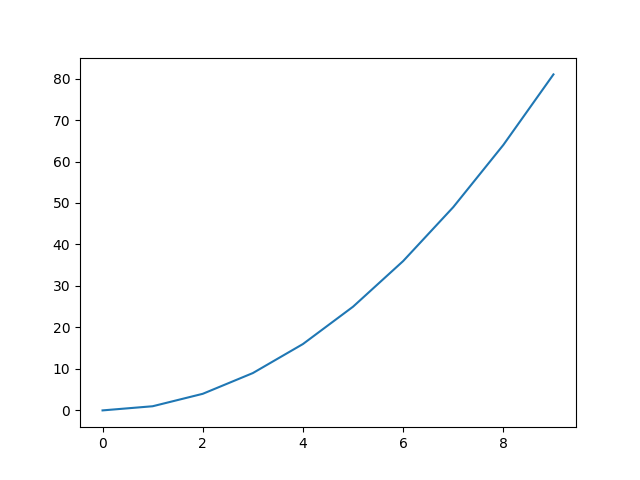

In [2]:
x = np.arange(10)
plt.figure()
plt.plot(x,x**2)